## Angel Barral Diaz
## We import some modules and preset the data ready to work with it 

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np
import pandas as pd

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
#Read the file and keep it in a dataframe
filePath = 'https://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz'
filePath = 'https://akalinow.web.cern.ch/akalinow/HiggsBoson_ML_challenge/atlas-higgs-challenge-2014-v2.csv.gz'

df = pd.read_csv(filePath)

df=df.sample(n=10000, random_state=1)
df.drop(columns = ['KaggleSet','KaggleWeight','Weight', 'EventId'], inplace = True)
df['Label'] = df['Label']=='s'
df['Label'] = df['Label'].astype(int)

In [3]:
from sklearn.model_selection import train_test_split

#Split data into trains and test sets
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)

#Save the labels columns
y_train = df_train['Label']
y_test = df_test['Label']


print(colored("Train labels shape:","blue"), y_train.shape)
print(colored("Test labels shape:","blue"), y_test.shape)

print(colored("Train features shape:","blue"), df_train.shape)
print(colored("Test features shape:","blue"), df_test.shape)

df.head(10)

Train labels shape: (8000,)
Test labels shape: (2000,)
Train features shape: (8000, 31)
Test features shape: (2000, 31)


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
755442,96.278,52.798,66.239,4.500,-999.000,-999.000,-999.000,3.117,4.500,66.204,...,97.657,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
689730,70.984,51.882,54.936,9.215,-999.000,-999.000,-999.000,2.317,54.293,115.236,...,95.215,1,60.764,0.453,1.523,-999.000,-999.00,-999.000,60.764,0
357609,116.945,19.162,79.868,144.923,-999.000,-999.000,-999.000,1.495,28.391,252.455,...,287.841,1,124.169,2.487,-1.363,-999.000,-999.00,-999.000,124.169,1
584061,128.609,51.812,78.701,209.987,1.413,290.661,-0.262,1.432,90.460,399.141,...,554.278,2,178.186,1.193,-2.199,81.832,-0.22,0.124,260.018,1
485493,129.960,81.204,83.901,62.030,-999.000,-999.000,-999.000,3.096,41.568,109.597,...,298.497,1,30.173,3.195,-0.718,-999.000,-999.00,-999.000,30.173,1
625913,183.519,68.527,112.096,98.641,-999.000,-999.000,-999.000,2.743,39.234,187.278,...,190.219,1,62.337,1.585,1.163,-999.000,-999.00,-999.000,62.337,0
49414,97.047,22.818,73.317,0.185,-999.000,-999.000,-999.000,2.905,0.185,71.457,...,48.417,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
621964,127.649,22.276,70.856,34.338,-999.000,-999.000,-999.000,3.056,0.912,107.707,...,93.035,1,34.329,-0.442,0.027,-999.000,-999.00,-999.000,34.329,1
590565,-999.000,64.859,42.315,59.059,-999.000,-999.000,-999.000,1.290,59.059,70.750,...,195.489,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0
121996,-999.000,137.892,96.755,27.775,-999.000,-999.000,-999.000,2.751,27.775,108.227,...,104.511,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


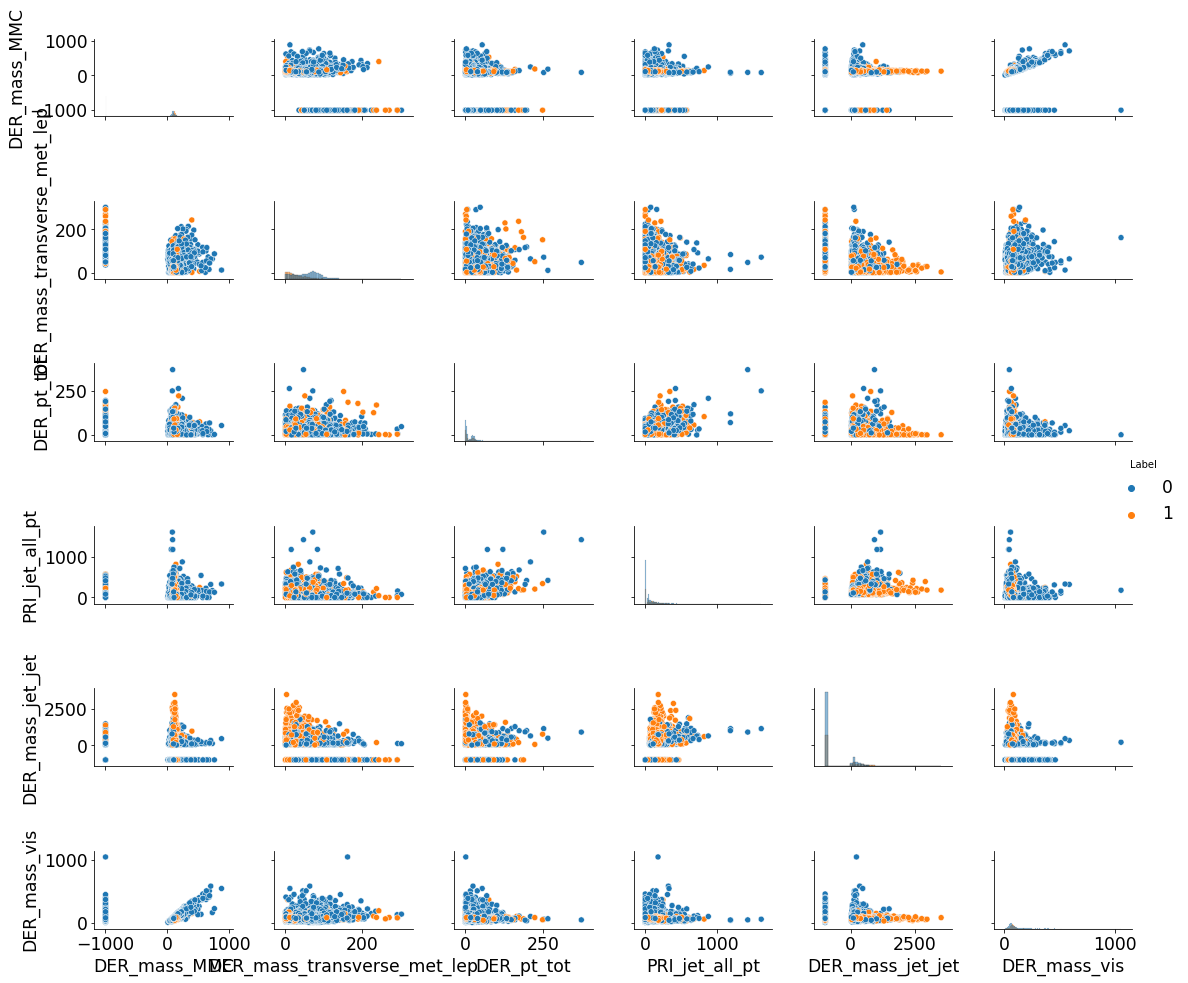

In [403]:
#Now we will check some of the parameters to see if we can see any correlation
columns = ['DER_mass_MMC', 'DER_mass_transverse_met_lep','DER_pt_tot','PRI_jet_all_pt','DER_mass_jet_jet', 'DER_mass_vis']

graph = sns.PairGrid(df_train, vars=columns, hue="Label")
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot);
graph.add_legend();
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)      

## Now that we have the data and the parameters where we want to focus we can proceed with the training 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


[]

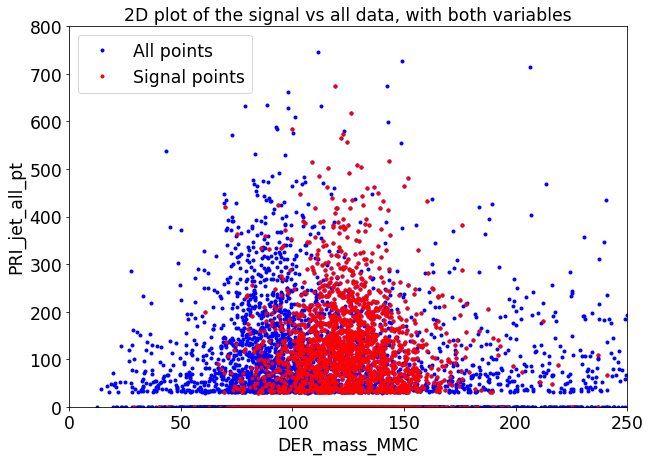

In [14]:
#We will select the following variables that seem to have a triangular correlation area

plt.plot(df_train["DER_mass_MMC"], df_train["PRI_jet_all_pt"], '.b', label='All points')
plt.plot(df_train["DER_mass_MMC"].loc[(y_train==1)*(df_train["DER_mass_MMC"]>0)], df_train["PRI_jet_all_pt"].loc[(y_train==1)*(df_train["DER_mass_MMC"]>0)], '.r', label ='Signal points')
plt.legend(loc='best')
plt.xlim(0,250)
plt.ylim(0,800)
plt.title("2D plot of the signal vs all data, with both variables")
plt.ylabel("PRI_jet_all_pt")
plt.xlabel("DER_mass_MMC")
plt.plot()

Text(0.5, 0, '')

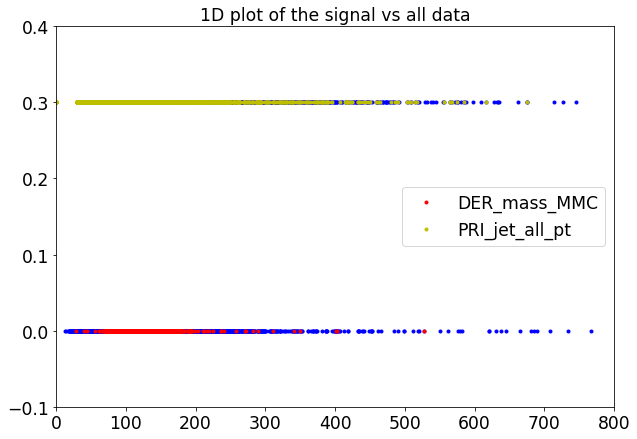

In [15]:
plt.plot(df_train["DER_mass_MMC"],np.zeros(len(df_train["DER_mass_MMC"])), 'b.')
plt.plot(df_train["DER_mass_MMC"].loc[(y_train==1)],np.zeros(len(df_train["DER_mass_MMC"].loc[(y_train==1)])), 'r.', label='DER_mass_MMC')
plt.plot(df_train["PRI_jet_all_pt"],np.zeros(len(df_train["PRI_jet_all_pt"]))+0.3, 'b.')
plt.plot(df_train["PRI_jet_all_pt"].loc[(y_train==1)],np.zeros(len(df_train["PRI_jet_all_pt"].loc[(y_train==1)]))+0.3, 'y.', label = 'PRI_jet_all_pt')
plt.xlim(0,800)
plt.ylim(-0.1,0.4)
plt.title("1D plot of the signal vs all data")
plt.legend(loc='center right')
plt.xlabel("")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


[]

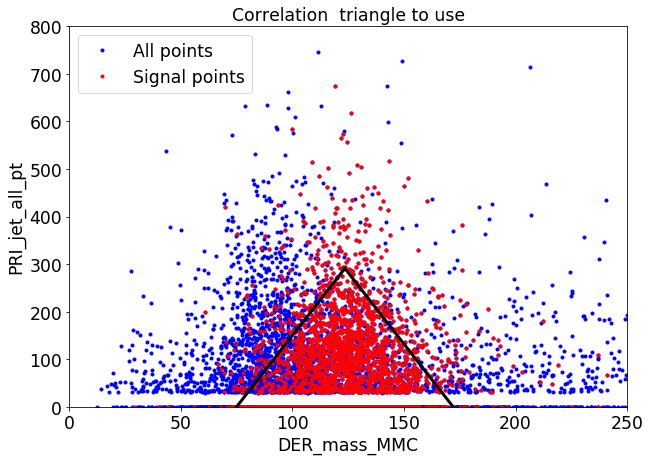

In [16]:
#Now we will model this correlation area with the train values to use later with the test:

mean_MMC=df_train["DER_mass_MMC"].loc[(y_train==1)*(df_train["DER_mass_MMC"]>0)].mean()
std_MMC = df_train["DER_mass_MMC"].loc[(y_train==1)*(df_train["DER_mass_MMC"]>0)].std()

step1=np.linspace(60,mean_MMC,10)
step2=np.linspace(mean_MMC,180,10)

slope1 = (300)/(125-75)
slope2=-slope1
origin1 = -75*slope1
origin2 = -172*slope2
y1 = step1*slope1+origin1
y2 = step2*slope2+origin2

plt.plot(df_train["DER_mass_MMC"], df_train["PRI_jet_all_pt"], '.b', label='All points')
plt.plot(df_train["DER_mass_MMC"].loc[(y_train==1)*(df_train["DER_mass_MMC"]>0)], df_train["PRI_jet_all_pt"].loc[(y_train==1)*(df_train["DER_mass_MMC"]>0)], '.r', label ='Signal points')
plt.plot(step1,y1,'k-',linewidth=3)
plt.plot(step2,y2,'k-',linewidth=3)
plt.legend(loc='best')
plt.xlim(0,250)
plt.ylim(0,800)
plt.title("Correlation  triangle to use")
plt.ylabel("PRI_jet_all_pt")
plt.xlabel("DER_mass_MMC")
plt.plot()


In [17]:
#We now will define a function to check if the values are  inside this triangle or not

def f(mmc,jet):
    if mmc>mean_MMC:
        val = (slope1*mmc+origin1)-jet
    elif mmc<mean_MMC:
        val = (slope2*mmc+origin2)-jet
    return -val

In [18]:
#We finally run this function and obtain the accuracy

mmc = np.array(df_test["DER_mass_MMC"])
jet = np.array(df_test["DER_mass_jet_jet"])
y_pred = []
for i in range(len(mmc)):
    val = f(mmc[i],jet[i])
    if val<0:
        bool=0
    elif val>=0:
        bool=1
    y_pred.append(bool)


## Now we can proceed printing the accuracy and the confusion matrix

Test set: accuracy score 0.701


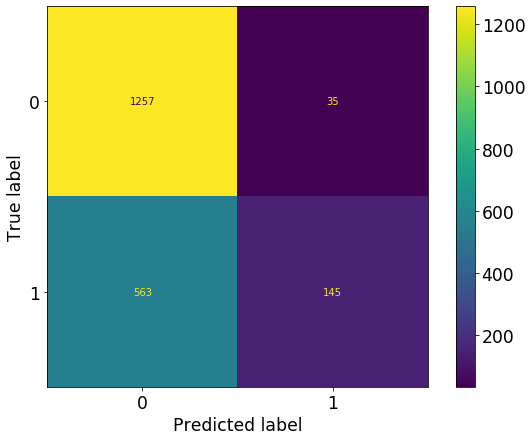

In [19]:
acc= accuracy_score(y_test, y_pred)
print(colored('Test set: accuracy score','blue'), acc)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
